# Amazon electronics dataset exploration

## 2018 Amazon Review Data

A subset of the Amazon Review Data (2018), the electronics category data is roughly 20M engagements from Amazon users.  

*Source*: Justifying recommendations using distantly-labeled reviews and fined-grained aspects
Jianmo Ni, Jiacheng Li, Julian McAuley
Empirical Methods in Natural Language Processing (EMNLP), 2019, https://nijianmo.github.io/amazon/index.html

In [34]:
!ls ../data/2018

Electronics.csv


In [30]:
import pandas as pd
df = pd.read_csv('../data/2018/Electronics.csv', nrows=10000, names=["item", "user", "rating", "timestamp"])

Ratings only: These datasets include no metadata or reviews, but only (item,user,rating,timestamp) tuples. Thus they are suitable for use with mymedialite (or similar) packages.

In [31]:
df.head()

,item,user,rating,timestamp
0,0060009810,A1N070NS9CJQ2I,5.0,1026864000
1,0060009810,A3P0KRKOBQK1KN,5.0,1025913600
2,0060009810,A192HO2ICJ75VU,5.0,1025654400
3,0060009810,A2T278FKFL3BLT,4.0,1025395200
4,0060009810,A2ZUXVTW8RXBXW,5.0,1025222400


In [32]:
len(df)

10000

Hmm... are the four columns sufficient for our system? Can we infer a purchase based on the presence of a rating? Do we assume a user with no rating for a product failed to purchase? Yeesh... that doesn't seem supportable. I guess the prediction here is not whether they bought it but whether they were motivated to source a review. Here the review becomes the reward, not the sale ... go off and read the paper: https://cseweb.ucsd.edu/~jmcauley/pdfs/emnlp19a.pdf

In [17]:
df.describe()

,rating,timestamp
count,2.099435e+07,2.099435e+07
mean,4.073685e+00,1.425967e+09
std,1.385792e+00,7.769201e+07
min,1.000000e+00,8.811936e+08
25%,4.000000e+00,1.394064e+09
50%,5.000000e+00,1.440634e+09
75%,5.000000e+00,1.478736e+09
max,5.000000e+00,1.538698e+09


In [16]:
df.item.value_counts()

item
B010OYASRG    28539
B00L0YLRUW    20873
B00DIF2BO2    17045
B006GWO5WK    16130
B003L1ZYYW    16056
              ...  
B00GXO0W5K        1
B00GXOIMF2        1
B00A8ZGSOE        1
B003ZTYGMG        1
B01HJF4DUG        1
Name: count, Length: 756489, dtype: int64

## 2023 Amazon Reviews Data

### Preprocessing

In [1]:
!ls -lh ../data/2023

total 35G
-rw-rw-r-- 1 grim grim  22G Jul 19 10:34 Electronics.jsonl
-rw-rw-r-- 1 grim grim 4.5G Jul 19 13:44 Electronics_max.jsonl
-rw-rw-r-- 1 grim grim 1.1G Jul 19 13:27 Electronics_min.jsonl
-rw-rw-r-- 1 grim grim 4.9G Jul 19 10:34 meta_Electronics.jsonl
-rw-rw-r-- 1 grim grim 2.8G Jul 19 13:32 meta_Electronics_min.jsonl
-rw-rw-r-- 1 grim grim  65M Jul 19 13:11 test.jsonl
-rw-rw-r-- 1 grim grim 1.1M Jul 19 13:00 test_min.jsonl
-rw-rw-r-- 1 grim grim 2.0K Jul 19 13:11 tiny.jsonl
-rw-rw-r-- 1 grim grim  109 Jul 19 13:12 tiny_min.jsonl


2023 publication, see https://amazon-reviews-2023.github.io/

In [2]:
import json 
import pandas as pd

In [4]:
reviews = pd.read_json('../data/2023/Electronics.jsonl', lines=True, nrows=100, )

In [5]:
reviews.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,3,Smells like gasoline! Going back!,First & most offensive: they reek of gasoline ...,[{'small_image_url': 'https://m.media-amazon.c...,B083NRGZMM,B083NRGZMM,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2022-07-18 22:58:37.948,0,True
1,1,Didn’t work at all lenses loose/broken.,These didn’t work. Idk if they were damaged in...,[],B07N69T6TM,B07N69T6TM,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-06-20 18:42:29.731,0,True
2,5,Excellent!,I love these. They even come with a carry case...,[],B01G8JO5F2,B01G8JO5F2,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2018-04-07 09:23:37.534,0,True
3,5,Great laptop backpack!,I was searching for a sturdy backpack for scho...,[],B001OC5JKY,B001OC5JKY,AGGZ357AO26RQZVRLGU4D4N52DZQ,2010-11-20 18:41:35.000,18,True
4,5,Best Headphones in the Fifties price range!,I've bought these headphones three times becau...,[],B013J7WUGC,B07CJYMRWM,AG2L7H23R5LLKDKLBEF2Q3L2MVDA,2023-02-17 02:39:41.238,0,True


In [ ]:
# We need to reduce the size of this dataset or risk blowing our memory budget, filter down to essentials for our prediction task 
!cd ../data/2023 && jq -c '{rating, parent_asin, user_id, timestamp}' Electronics.jsonl > Electronics_min.jsonl

In [3]:
reviews = pd.read_json('../data/2023/Electronics_min.jsonl', lines=True)

In [4]:
reviews.to_parquet("../data/2023/Electronics_min.parquet")

In [17]:
reviews.iloc[0]

rating                                    3
parent_asin                      B083NRGZMM
user_id        AFKZENTNBQ7A7V7UXW5JJI6UGRYQ
timestamp        2022-07-18 22:58:37.948000
Name: 0, dtype: object

In [18]:
len(reviews.user_id.unique())

2294450

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'timestamp'}>]], dtype=object)

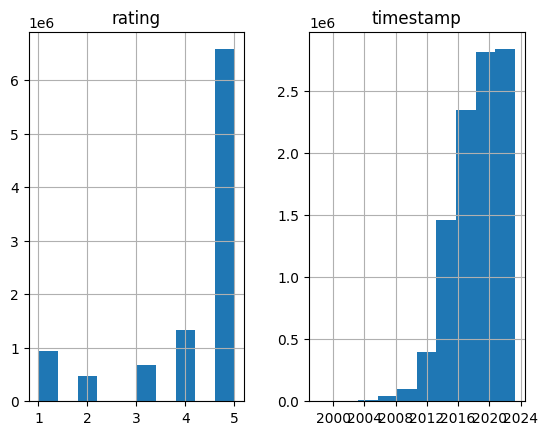

In [19]:
reviews.hist()

In [20]:
items = pd.read_json("../data/2023/meta_Electronics.jsonl", lines=True, nrows=100) 

In [21]:
items.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together
0,All Electronics,FS-1051 FATSHARK TELEPORTER V3 HEADSET,3.5,6,[],[Teleporter V3 The “Teleporter V3” kit sets a ...,NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],Fat Shark,"[Electronics, Television & Video, Video Glasses]","{'Date First Available': 'August 2, 2014', 'Ma...",B00MCW7G9M,NaN
1,All Electronics,Ce-H22B12-S1 4Kx2K Hdmi 4Port,5.0,1,"[UPC: 662774021904, Weight: 0.600 lbs]",[HDMI In - HDMI Out],NaN,[{'thumb': 'https://m.media-amazon.com/images/...,[],SIIG,"[Electronics, Television & Video, Accessories,...",{'Product Dimensions': '0.83 x 4.17 x 2.05 inc...,B00YT6XQSE,NaN
2,Computers,Digi-Tatoo Decal Skin Compatible With MacBook ...,4.5,246,[WARNING: Please IDENTIFY MODEL NUMBER on the ...,[],19.99,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'AL 2Sides Video', 'url': 'https://...",Digi-Tatoo,"[Electronics, Computers & Accessories, Laptop ...","{'Brand': 'Digi-Tatoo', 'Color': 'Fresh Marble...",B07SM135LS,NaN
3,AMAZON FASHION,NotoCity Compatible with Vivoactive 4 band 22m...,4.5,233,[☛NotoCity 22mm band is designed for Vivoactiv...,[],9.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],NotoCity,"[Electronics, Wearable Technology, Clips, Arm ...","{'Date First Available': 'May 29, 2020', 'Manu...",B089CNGZCW,NaN
4,Cell Phones & Accessories,Motorola Droid X Essentials Combo Pack,3.8,64,"[New Droid X Essentials Combo Pack, Exclusive ...",[all Genuine High Quality Motorola Made Access...,14.99,[{'thumb': 'https://m.media-amazon.com/images/...,[],Verizon,"[Electronics, Computers & Accessories, Compute...",{'Product Dimensions': '11.6 x 6.9 x 3.1 inche...,B004E2Z88O,NaN


In [25]:
# Filter down to essential fields
!cd ../data/2023 && jq -c '{title, average_rating, description, price, images, rating_number, parent_asin}' meta_Electronics.jsonl > meta_Electronics_min.jsonl

In [1]:
import pandas as pd

In [2]:
# Note this for whatever reason burns about 30G of RAM during the load, even though the json is only 2.8G uncompressed, we should get this into a parquet file stat
items = pd.read_json("../data/2023/meta_Electronics.jsonl", lines=True)

In [ ]:
items.drop(['main_category', 'features', 'videos', 'store', 'categories', 'details', 'bought_together', 'subtitle', 'author'], axis=1, inplace=True)

Signature:
items.drop(
    labels: 'IndexLabel | None' = None,
    *,
    axis: 'Axis' = 0,
    index: 'IndexLabel | None' = None,
    columns: 'IndexLabel | None' = None,
    level: 'Level | None' = None,
    inplace: 'bool' = False,
    errors: 'IgnoreRaise' = 'raise',
) -> 'DataFrame | None'
Docstring:
Drop specified labels from rows or columns.

Remove rows or columns by specifying label names and corresponding
axis, or by directly specifying index or column names. When using a
multi-index, labels on different levels can be removed by specifying
the level. See the :ref:`user guide <advanced.shown_levels>`
for more information about the now unused levels.

Parameters
----------
labels : single label or list-like
    Index or column labels to drop. A tuple will be used as a single
    label and not treated as a list-like.
axis : {0 or 'index', 1 or 'columns'}, default 0
    Whether to drop labels from the index (0 or 'index') or
    columns (1 or 'columns').
index : single label or l

In [20]:
items.head()

,title,average_rating,rating_number,description,price,images,parent_asin
0,FS-1051 FATSHARK TELEPORTER V3 HEADSET,3.5,6,[Teleporter V3 The “Teleporter V3” kit sets a ...,None,[{'thumb': 'https://m.media-amazon.com/images/...,B00MCW7G9M
1,Ce-H22B12-S1 4Kx2K Hdmi 4Port,5.0,1,[HDMI In - HDMI Out],None,[{'thumb': 'https://m.media-amazon.com/images/...,B00YT6XQSE
2,Digi-Tatoo Decal Skin Compatible With MacBook ...,4.5,246,[],19.99,[{'thumb': 'https://m.media-amazon.com/images/...,B07SM135LS
3,NotoCity Compatible with Vivoactive 4 band 22m...,4.5,233,[],9.99,[{'thumb': 'https://m.media-amazon.com/images/...,B089CNGZCW
4,Motorola Droid X Essentials Combo Pack,3.8,64,[all Genuine High Quality Motorola Made Access...,14.99,[{'thumb': 'https://m.media-amazon.com/images/...,B004E2Z88O


In [22]:
items.price = items.price.astype(str)

In [23]:
items.to_parquet("../data/2023/meta_Electronics.parquet")

In [24]:
len(items)

1610012

array([[<Axes: title={'center': 'average_rating'}>,
        <Axes: title={'center': 'rating_number'}>]], dtype=object)

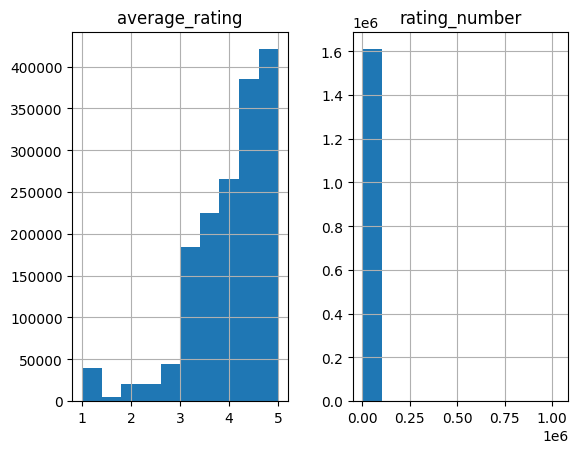

In [25]:
items.hist()

In [17]:
items.iloc[0]

main_category                                        All Electronics
title                         FS-1051 FATSHARK TELEPORTER V3 HEADSET
average_rating                                                   3.5
rating_number                                                      6
features                                                          []
description        [Teleporter V3 The “Teleporter V3” kit sets a ...
price                                                           None
images             [{'thumb': 'https://m.media-amazon.com/images/...
videos                                                            []
store                                                      Fat Shark
categories          [Electronics, Television & Video, Video Glasses]
details            {'Date First Available': 'August 2, 2014', 'Ma...
parent_asin                                               B00MCW7G9M
bought_together                                                  NaN
subtitle                          

In [18]:
# Per the dataset documentation: Note: Products with different colors, styles, sizes usually belong to the same parent ID. 
# The “asin” in previous Amazon datasets is actually parent ID. Please use parent ID to find product meta.
item = reviews.iloc[5].parent_asin
items[items.parent_asin == item]

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
1068151,Amazon Home,"Fancii Small Personal Desk USB Fan, Portable M...",4.0,11448,[Twin turbo Cyclone-Blade technology provides ...,[],15.99,[{'thumb': 'https://m.media-amazon.com/images/...,"[{'title': 'Good air, loud rattle', 'url': 'ht...",Fancii,"[Electronics, Computers & Accessories, Compute...","{'Brand': 'Fancii', 'Color': 'Black', 'Electri...",B07CML419K,NaN,NaN,NaN


In [19]:
reviews[reviews.parent_asin == items.iloc[1].parent_asin]

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase


I can't load the entirety of the reviews in one shot... but I can fit every item in memory. So every review will be grounded to an item, but many reviews will be hidden. I don't think this matters for this project. If I want to fit more reviews, I can simply preprocess the data to rejct unneeded fields and (notably text fields) and dramatically reduce memory requirements. I can alternatively load only the critical columns, yes? 

### EDA

In [3]:
import pandas as pd

In [4]:
reviews = pd.read_parquet("../data/2023/Electronics_min.parquet")
items = pd.read_parquet("../data/2023/meta_Electronics.parquet")

In [5]:
reviews.head()

,rating,parent_asin,user_id,timestamp
0,3,B083NRGZMM,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2022-07-18 22:58:37.948
1,1,B07N69T6TM,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2020-06-20 18:42:29.731
2,5,B01G8JO5F2,AFKZENTNBQ7A7V7UXW5JJI6UGRYQ,2018-04-07 09:23:37.534
3,5,B001OC5JKY,AGGZ357AO26RQZVRLGU4D4N52DZQ,2010-11-20 18:41:35.000
4,5,B07CJYMRWM,AG2L7H23R5LLKDKLBEF2Q3L2MVDA,2023-02-17 02:39:41.238


In [6]:
items.head()

,title,average_rating,rating_number,description,price,images,parent_asin
0,FS-1051 FATSHARK TELEPORTER V3 HEADSET,3.5,6,[Teleporter V3 The “Teleporter V3” kit sets a ...,None,"[{'hi_res': None, 'large': 'https://m.media-am...",B00MCW7G9M
1,Ce-H22B12-S1 4Kx2K Hdmi 4Port,5.0,1,[HDMI In - HDMI Out],None,[{'hi_res': 'https://m.media-amazon.com/images...,B00YT6XQSE
2,Digi-Tatoo Decal Skin Compatible With MacBook ...,4.5,246,[],19.99,[{'hi_res': 'https://m.media-amazon.com/images...,B07SM135LS
3,NotoCity Compatible with Vivoactive 4 band 22m...,4.5,233,[],9.99,[{'hi_res': 'https://m.media-amazon.com/images...,B089CNGZCW
4,Motorola Droid X Essentials Combo Pack,3.8,64,[all Genuine High Quality Motorola Made Access...,14.99,"[{'hi_res': None, 'large': 'https://m.media-am...",B004E2Z88O


We need to build a compact user-centric representation of preference, collapse review data into a sparse matrix of user -> item preferences. There are some heuristics that need to be applied in the process: 
1. users with few interactions are a very weak signal -- without associations with multiple products, we are not teaching the model about positive associations
2. products with few interactions are also a very weak signal -- we are looking to connect users and items that have tiny interaction graphs are not going to improve our macro-level predictions

In [7]:
# This is an algo hyper parameter
min_ratings = 1000
items = items[items.rating_number > min_ratings]
len(items) 

42604

In [8]:
len(items.parent_asin.unique())

42604

In [9]:
users = reviews.groupby(['user_id']).rating.count()
len(users)

2294450

In [10]:
# This is an algorithm parameter
min_reviews = 100
users = users[users > min_reviews] 
users

user_id
AE24MJNUNU6742TQKIEUDUYFI2VA    105
AE27QAUZVFLTO45RXMRTPP3YE5XA    114
AE2AZ2MNROPF33U6SS53VI22OXJA    106
AE2GYIOEW7WONM6D7PL5ERSXPNAA    156
AE2IPGKCTT6QVJ55FT45ABL4HDQQ    124
                               ... 
AHZIG7YH6F3P3DFUPL3GRIRMITEA    212
AHZQRSEKU5QA6LDGVRFJ4TLCNISA    102
AHZTPSUD3LFQ6YNNPEUUTX2QVPFQ    123
AHZVNDBSVL6BWGT2446JDYEDQUJQ    196
AHZXUVZPQKX64ENVFKBNIKW3DF6A    207
Name: rating, Length: 1351, dtype: int64

In [11]:
reviews = reviews[reviews.user_id.isin(set(users.index))]

In [12]:
reviews

,rating,parent_asin,user_id,timestamp
485,5,B06X9ZNT4P,AFZUK3MTBIBEDQOPAK3OATUOUKLA,2023-02-27 17:59:30.124
486,5,B08KSG2JMV,AFZUK3MTBIBEDQOPAK3OATUOUKLA,2023-01-13 23:52:49.320
487,5,B07H65KP63,AFZUK3MTBIBEDQOPAK3OATUOUKLA,2023-01-09 18:29:43.584
488,4,B08TBDBQ1C,AFZUK3MTBIBEDQOPAK3OATUOUKLA,2023-01-09 17:56:48.981
489,5,B0BC87S9SY,AFZUK3MTBIBEDQOPAK3OATUOUKLA,2023-01-01 00:38:53.148
...,...,...,...,...
9997257,1,B01M7VOJFW,AE2PW46GBDEGQWODRAH5MG2KNT7A,2012-08-21 21:54:53.000
9997258,4,B0084QSDBA,AE2PW46GBDEGQWODRAH5MG2KNT7A,2012-08-21 21:27:55.000
9997259,3,B07BSJCMGS,AE2PW46GBDEGQWODRAH5MG2KNT7A,2012-08-21 21:15:47.000
9997260,5,B08HKGXGML,AE2PW46GBDEGQWODRAH5MG2KNT7A,2012-08-17 12:21:37.000


We now have thresholded lists of reviews and items. Assemble the user matrix, which requires both. 

In [13]:
matrix_size = len(users) * len(items)
matrix_size

57558004

In [14]:
u = pd.DataFrame(users).reset_index()
u

,user_id,rating
0,AE24MJNUNU6742TQKIEUDUYFI2VA,105
1,AE27QAUZVFLTO45RXMRTPP3YE5XA,114
2,AE2AZ2MNROPF33U6SS53VI22OXJA,106
3,AE2GYIOEW7WONM6D7PL5ERSXPNAA,156
4,AE2IPGKCTT6QVJ55FT45ABL4HDQQ,124
...,...,...
1346,AHZIG7YH6F3P3DFUPL3GRIRMITEA,212
1347,AHZQRSEKU5QA6LDGVRFJ4TLCNISA,102
1348,AHZTPSUD3LFQ6YNNPEUUTX2QVPFQ,123
1349,AHZVNDBSVL6BWGT2446JDYEDQUJQ,196


In [1]:
from recommenders.datasets.sparse import AffinityMatrix

In [2]:
import numpy as np 
import pandas as pd 

In [17]:
items

,title,average_rating,rating_number,description,price,images,parent_asin
12,NANW Bands Compatible with Fitbit Versa/Versa ...,4.6,4249,[],None,[{'hi_res': 'https://m.media-amazon.com/images...,B07PXWYLQX
37,Wenlaty Case Compatible with iPad 9th /8th /7t...,4.7,1915,[],19.99,[{'hi_res': 'https://m.media-amazon.com/images...,B09M7TH3YC
46,PNY 1TB PRO Elite Class 10 U3 V30 microSDXC Fl...,4.7,3380,[PNY PRO Elite Class 10 U3 V30 microSD Cards o...,109.99,[{'hi_res': 'https://m.media-amazon.com/images...,B0BSQL7M51
61,iCasso Compatible with MacBook Pro 13 Inch Cas...,4.4,3503,[],27.99,[{'hi_res': 'https://m.media-amazon.com/images...,B08GFTPQ5B
66,SUPCASE UB Pro Series Case for iPad Pro 12.9 i...,4.5,4050,[],27.99,[{'hi_res': 'https://m.media-amazon.com/images...,B086W46TYP
...,...,...,...,...,...,...,...
1608289,Sony MDR-XB50AP in-Ear Extra Bass Headphones w...,4.4,5753,[This pair of extra bass in-ear headphones com...,None,[{'hi_res': 'https://m.media-amazon.com/images...,B014R2W52W
1608365,[Apple MFi Certified] iPhone Headphone Adapter...,4.3,22650,[],12.99,[{'hi_res': 'https://m.media-amazon.com/images...,B0C9CBLTRF
1608595,Hampton Frames Dispenser Box with 250 Photogra...,4.4,4309,"[Product Description, Photo corners are self a...",3.99,[{'hi_res': 'https://m.media-amazon.com/images...,B01M70M7WY
1609122,Airpod Case AIRSPO Airpods Case Cover for Appl...,4.8,1192,[Airpod Case AIRSPO Airpods Case Cover for App...,None,[{'hi_res': 'https://m.media-amazon.com/images...,B098L5RPFS


In [18]:
#ui_matrix = AffinityMatrix(df=users, items_list=items)
ui_matrix = AffinityMatrix(df=users)

In [19]:
x, _, _ = ui_matrix.gen_affinity_matrix()

TypeError: Series.sort_values() got an unexpected keyword argument 'by'

## Model Design 

Managing text-based reviews at this scale could be a challenge, and I'd like to steer clear of LLMs for this effort. We could do an embedding on the review and use that for similarity, but we have pretty rich item data. Perhaps let's ignore the collaborative aspect here and build a shopping interface that: 
- surfaces the most popular items, and encourages you to add items to your shopping cart for a big discount/promo
- based on clicks and cart items, improves the recommendations and surfaces new products

We can use an autoencoder to accept a sparse matrix of users and items, learn to reproduce that matrix, and in so doing support prediction on missing values. However, this matrix is of size users x items, which here is 1.8e7 x 1.6e6 = 28,125,000,000 KB (best-case, higher if stored as np floats) ~= 26 TB !! WTF. 
- In the standard VAE example (https://github.com/recommenders-team/recommenders/blob/main/examples/02_model_collaborative_filtering/standard_vae_deep_dive.ipynb) the clicks are turned into a histogram for each user ... so we have n_user vector of length n_items... then I guess each of these is a training sample. The VAE presumably learns, given a sparse user vector, to predict every rating. This takes the complexity down and gives us a training set we can iterate over. 

Let's avoid any distributional pressure (present in VAE, SVAE, disentangled VAE) and go for a basic autoencoder using the strategy laid out above, i.e.

## Autoencoder Prototype

In [ ]:
import torch 
import pandas as pd 
import torch
from tqdm import tqdm
import os
import math 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import wandb

In [ ]:
class Autoencoder(nn.Module):
    """
    Autoencoder

    NOTE: with cues from https://www.geeksforgeeks.org/deep-learning/implementing-an-autoencoder-in-pytorch/
    """

    def __init__(self, dims=1000):
        """
        Initialize a new object 
        """
        super().__init__()

        self.encoder = nn.Sequential(
            nn.Linear(dims, 500),
            nn.Linear(500, 75),
        )
        self.decoder = nn.Sequential(
            nn.Linear(75, 500),
            nn.Linear(500, dims),
        )

    def forward(self, x):
        """
        Implement our forward pass 
        """
        h = self.encoder(x) 
        r = self.decoder(h)

        return r

In [ ]:
class DeepCartDataset(torch.utils.data.Dataset): 
    """
    Custom pytorch-compatible dataset. Adapted from 
    https://pytorch.org/tutorials/beginner/basics/data_tutorial.html#creating-a-custom-dataset-for-your-files
    """
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None): 

        self.img_labels = pd.read_csv(annotations_file)

        #TODO: implement

    def __len__(self): 
        return len(self.img_labels) 
    
    def __getitem__(self, idx): 
        #TODO: implement
        pass

In [1]:
def get_data_loader(batch_size=5, shuffle=True): 
    """
    Retrieve a pytorch-style dataloader 
    """

    #TODO: implement
    #transform = transforms.Compose([
    #     transforms.ConvertImageDtype(torch.float),
    #     transforms.Normalize(mean=[0.5], std=[0.5])
    #])

    #data = DeepCartDataset(transform=transform)
    #loader = torch.utils.data.DataLoader(data, batch_size=batch_size, shuffle=shuffle)
    
    #return loader
    pass

In [2]:
def train(loader, model, loss_interval=20, epochs=2, lr=0.01, momentum=0.9):
    """
    Train the model with the provided dataset

    NOTE: this is a similar training loop as we used for our vision model in the 
    the vision project, forward pass
    """
    device = "cuda" if torch.cuda.is_available() else "cpu"
    
    train_loss = []

    tqdm.write(f"Starting training run...")    
    # TODO: configure WandB
    # see https://docs.wandb.ai/guides/integrations/pytorch/
    config = {}
    run = wandb.init(config=config) 

    model.train()
    model = model.to(device)
    
    loss_fn = nn.CrossEntropyLoss()

    optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum)

    for epoch in range(epochs):

        running_loss = 0.0
        for i, data in enumerate(loader):

            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)

            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()

            # collect metrics
            running_loss += loss.item()

            if (i % loss_interval) == (loss_interval - 1): 
                train_loss.append(running_loss / loss_interval)
                tqdm.write(f"[{epoch + 1}, {i + 1:5d}] loss: {running_loss / loss_interval:.3f}")
                running_loss = 0 
    
    tqdm.write("Training complete!") 

    return train_loss 